In [9]:
import pandas as pd

In [10]:
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [11]:
df = pd.concat([df1,df2,df3,df4,df5])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [14]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
49,Aracaju,2018-01-01,53.74,1522,3
97,Natal,2019-01-02,39.91,1037,3
162,Natal,2019-01-02,23.08,1036,2
52,Fortaleza,2019-01-01,15.22,1003,2
141,Natal,2019-01-02,9.08,1036,1


In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [16]:
df["LojaID"] = df["LojaID"].astype("object")

In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [19]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [21]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].fillna(0, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
df.dropna(how="all", inplace=True)

In [22]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
df["Receita"].max()

3544.0

In [27]:
df["Receita"].min()

3.34

In [28]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [32]:
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [33]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [34]:
df["Data"] = pd.to_datetime(df["Data"])

In [35]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [36]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [37]:
df["Ano_Venda"] = df["Data"].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,9.0,2018
80,Fortaleza,2019-01-01,47.88,1003,2,95.76,2.0,2019
57,Salvador,2019-01-01,11.72,1035,1,11.72,1.0,2019
24,Fortaleza,2019-01-01,35.38,1005,4,141.52,4.0,2019
126,Natal,2019-01-02,41.69,1036,2,83.38,2.0,2019


In [39]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
163,Natal,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2
38,Natal,2018-02-25,828.00,852,4,3312.00,4.0,2018,2,25
13,Aracaju,2018-01-01,43.45,1522,10,434.50,10.0,2018,1,1
67,Recife,2019-01-01,179.52,983,5,897.60,5.0,2019,1,1
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2


In [41]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
52,Recife,2019-01-01,11.87,981,6,71.22,6.0,2019,1,1,365 days
72,Fortaleza,2019-01-01,106.72,1003,4,426.88,4.0,2019,1,1,365 days
4,Recife,2019-02-14,19.89,983,7,139.23,7.0,2019,2,14,409 days
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,5.0,2019,1,1,365 days
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019,1,1,365 days


In [44]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,4.0,2019,2,13,408 days,1
176,Natal,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1
65,Natal,2019-04-05,292.00,852,2,584.00,2.0,2019,4,5,459 days,2
32,Aracaju,2018-01-01,42.97,1522,6,257.82,6.0,2018,1,1,0 days,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,2.0,2019,1,2,366 days,1


In [46]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3 )]

In [47]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,1.0,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,3,14,437 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,3.0,2019,3,2,425 days,1
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1


In [48]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

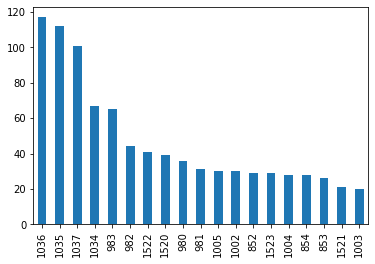

In [49]:
df["LojaID"].value_counts(ascending=False).plot.bar()

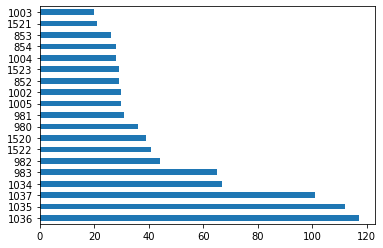

In [50]:
df["LojaID"].value_counts().plot.barh()

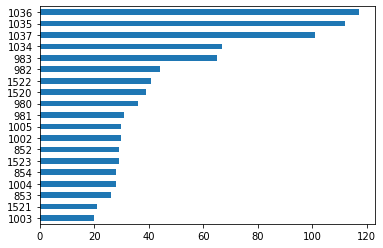

In [51]:
df["LojaID"].value_counts(ascending=True).plot.barh();

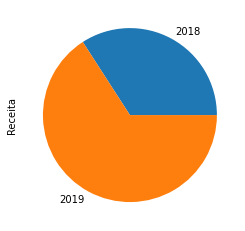

In [52]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [53]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

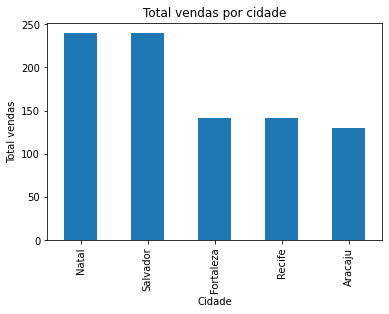

In [54]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

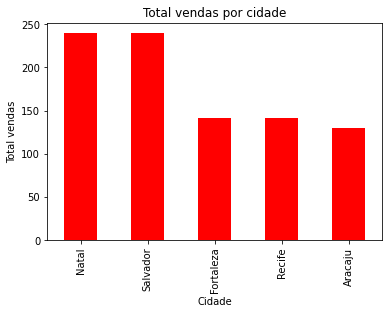

In [55]:
df["Cidade"].value_counts().plot.bar(title = "Total vendas por cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [56]:
plt.style.use("ggplot")

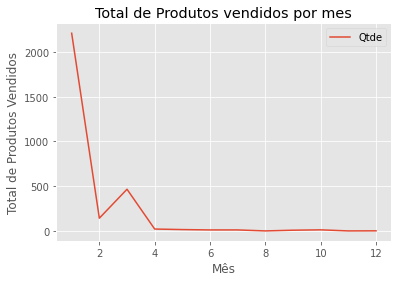

In [57]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos vendidos por mes")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [58]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [59]:
df_2019 = df[df["Ano_Venda"] == 2019]

In [60]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

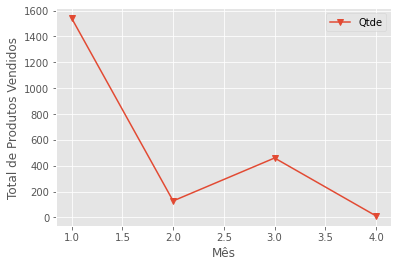

In [61]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

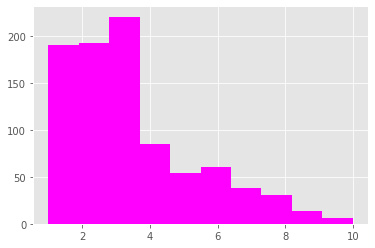

In [62]:
plt.hist(df["Qtde"], color = "magenta");

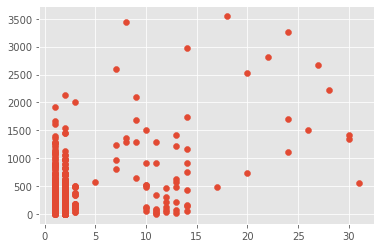

In [63]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

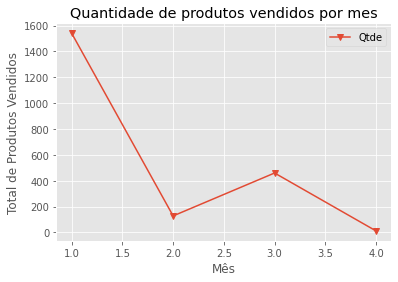

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker ="v")
plt.title("Quantidade de produtos vendidos por mes")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();
plt.savefig("grafico venda x mes.png")